In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

if code_dir_name not in str(Path.cwd()).split('/')[-1]:
    for _ in range(5):

        parent_path = str(Path.cwd().parents[_]).split('/')[-1]

        if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

            code_dir = str(Path.cwd().parents[_])

            if code_dir is not None:
                break
else:
    code_dir = str(Path.cwd())
sys.path.append(code_dir)

# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8


/opt/homebrew/Caskroom/miniforge/base/envs/Automating_Equity1/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

# Analysis plan:

1. ## [Descriptives and tables](./1.%20descriptives_and_tables.ipynb)
2. ## [Visualization](./2.%20visualization.ipynb)
3. ## [Frequencies and Normality tests](./2.%20frequencies_and_normality_test.ipynb)
   1. ### Frequencies, histograms, and QQ plots
      * Normal test
      * Kurtosis test
      * Shapiro
      * Anderson
      * Bartlett
   2. ### Correlation between independent variables (IVs) and control variables and Multicolinarity test
      * Pearson's R
      * VIF
     - ***ivs_dummy*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
     - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
     - ***% Sector per Workforce*** (continous ratio) = Sector percentage per worksforce (0-100)
     - ***num_words*** (continous ratio) = Number of words in job description
     - ***English Requirement in Job Ad*** (binary nominal) = English requirement in job description (0 vs. 1)
     - ***Dutch Requirement in Job Ad*** (binary nominal) = Dutch requirement in job description (0 vs. 1)
     - ***Platform*** (binary dummy) = LinkedIn (0 vs. 1), Indeed (0 vs. 1), Glassdoor (0 vs. 1)

4. ## [ANOVA and Chi-square (Pearson's R)](./3.%20chisqt_and_anova.ipynb)

   1. ### Chi-square
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)

   2. ### One-way ANOVA, interactions, and post-hoc test
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
          - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
          - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test
      * **df_jobs:**
         - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
         - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
           - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
           - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test

5. ## [Regression Analysis](./3.%20regression_analysis.ipynb)
   1. ### Logistic Regression  with all interaction (smf):
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   3. ### Multilevel OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)

6. ## [Specification Curve Analysis](./4.%20specification_curve_analysis.ipynb)

   1. ### Logistic Specification Curve Analysis:
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Specification Curve Analysis:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)


# READ DATA

In [3]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')
df_manual = categorize_df_gender_age(df_manual)


Dataframe loaded with shape: (5947, 75)


In [4]:
with open(f'{data_dir}df_jobs_for_analysis_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_jobs)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')
df_jobs = categorize_df_gender_age(df_jobs)


Dataframe loaded with shape: (308583, 101)


In [5]:
# Aggregate df_jobs into a new df_jobs_agg on column 'Sector' and mean of dvs_all, first for all other columns
word_nums_cols = [
    'Job Description spacy_sentencized_num_words',
    'Job Description spacy_sentencized_num_unique_words',
    'Job Description spacy_sentencized_num_chars',
    'Job Description spacy_sentencized_num_chars_no_whitespact_and_punt',
    'Job Description spacy_sentencized_num_punctuations',
    'Job Description_num_words',
    'Job Description_num_unique_words',
    'Job Description_num_chars',
    'Job Description_num_chars_no_whitespact_and_punt',
    'Job Description_num_punctuations',
]
df_jobs_agg = df_jobs.groupby('Job ID').agg(
    {
        **{col: 'first' for col in df_jobs.columns if col not in dvs_all and col != controls[0]},
        **{col: 'sum' for col in word_nums_cols},
        **{col: 'mean' for col in dvs_all},
    }
).reset_index(drop=True)


In [6]:
df_jobs_agg.head()


,Search Keyword,Platform,Job ID,Job Title,Company Name,Location,Job Description,Rating,Employment Type,Company URL,Job URL,Job Age,Job Age Number,Collection Date,Data Row,Tracking ID,Industry,Job Date,Type of ownership,Language,Dutch Requirement in Job Ad,English Requirement in Job Ad,Dutch Requirement in Job Ad_No,Dutch Requirement in Job Ad_Yes,English Requirement in Job Ad_No,English Requirement in Job Ad_Yes,Sector Code,Sector,Keywords Count,Gender_Female_n,Gender_Female_% per Sector,Gender_Female_% per Social Category,Gender_Female_% per Workforce,Gender_Male_n,Gender_Male_% per Sector,Gender_Male_% per Social Category,Gender_Male_% per Workforce,Gender,Age_Older_n,Age_Older_% per Sector,Age_Older_% per Social Category,Age_Older_% per Workforce,Age_Younger_n,Age_Younger_% per Sector,Age_Younger_% per Social Category,Age_Younger_% per Workforce,Age,Sector_n,% Sector per Workforce,Sector Job Advertisement Count,Sector Gender Designation Job Advertisement Count,Sector Age Designation Job Advertisement Count,Gender_Female,Gender_Male,Gender_Mixed,Age_Mixed,Age_Older,Age_Younger,Gender_Num,Age_Num,Interaction_Female_Older_% per Sector,Interaction_Female_Younger_% per Sector,Interaction_Male_Older_% per Sector,Interaction_Male_Younger_% per Sector,Platform_Num,Platform_LinkedIn,Platform_Indeed,Platform_Glassdoor,Job Description spacy_sentencized,Job Description spacy_sentencized_num_unique_words,Job Description spacy_sentencized_num_chars,Job Description spacy_sentencized_num_chars_no_whitespact_and_punt,Job Description spacy_sentencized_num_punctuations,Job Description_num_words,Job Description_num_unique_words,Job Description_num_chars,Job Description_num_chars_no_whitespact_and_punt,Job Description_num_punctuations,Job Description spacy_sentencized_lower,Dutch Requirement in Sentence,English Requirement in Sentence,Dutch Requirement in Sentence_No,Dutch Requirement in Sentence_Yes,English Requirement in Sentence_No,English Requirement in Sentence_Yes,Job Description spacy_tokenized,Job Description spacy_sentencized_cleaned,Job Description nltk_tokenized,Job Description gensim_tokenized,Job Description bert_tokenized,Warmth_actual,Competence_actual,Warmth_predicted,Warmth_Probability_predicted,Competence_predicted,Competence_Probability_predicted,Job Description spacy_sentencized_num_words,Warmth,Competence,Warmth_Probability,Competence_Probability
0,application developer,LinkedIn,1254300802,Software Engineer,bolcom,"Utrecht, Utrecht, Netherlands",How do you make our customers happyWith 10 mil...,NaN,Full-time,https://www.linkedin.com/jobs/view/externalApp...,https://nl.linkedin.com/jobs/view/software-eng...,4 days ago,4 days ago,25/11/2020,35.000,yqtOF0EWSqW+jj5XzmnqsQ==,"['Retail', 'Logistics and Supply Chain', 'Info...",21/11/2020,None,en,No,No,1.000,0.000,1.000,0.000,J,Information and communication,9.000,80.000,27.586,0.666,0.317,210.000,72.414,1.585,0.831,Male,95.000,32.759,0.894,0.376,195.000,67.241,1.333,0.772,Mixed Age,290.000,1.148,2895.000,6974.000,11464.000,0.000,1.000,0.000,1.000,0.000,0.000,2,1,903.686,1854.935,2372.176,4869.203,0.000,1.000,0.000,0.000,How do you make our customers happy,432.000,2726.000,2235.000,0.000,9400.000,5560.000,54960.000,44700.000,0.000,how do you make our customers happy,No,No,1.000,0.000,1.000,0.000,"[how, do, you, make, our, customers, happy]",how do you make our customers happy,"[make, customers, happy]","[custom, happi]","[how, do, you, make, our, customers, happy]",NaN,NaN,NaN,NaN,NaN,NaN,477.000,0.400,0.400,0.417,0.350
1,education,LinkedIn,1310845106,Volunteer: Teaching and Education Project in G...,Global Nomadic,"Amsterdam, North Holland, Netherlands","Location Quetzaltenango, GuatemalaDuration Min...",NaN,Volunteer,https://www.linkedin.com/jobs/view/externalApp...,https://nl.linkedin.com/jobs/view/volunteer-te...,5 days ago,5 days ago,2020-11-24,559.000,OejPIMBaQ2GWilZSZMID5Q==,"['Nonprofit Organization Management', 'Primary...",2020-11-19,None,en,No,No,1.000,0.000,1.000,0.000,

In [7]:
df_jobs_agg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16135 entries, 0 to 16134
Columns: 101 entries, Search Keyword to Competence_Probability
dtypes: category(4), float64(66), int64(2), object(29)
memory usage: 12.0+ MB


In [8]:
df_jobs_agg.describe()


,Rating,Data Row,Dutch Requirement in Job Ad_No,Dutch Requirement in Job Ad_Yes,English Requirement in Job Ad_No,English Requirement in Job Ad_Yes,Keywords Count,Gender_Female_n,Gender_Female_% per Sector,Gender_Female_% per Social Category,Gender_Female_% per Workforce,Gender_Male_n,Gender_Male_% per Sector,Gender_Male_% per Social Category,Gender_Male_% per Workforce,Age_Older_n,Age_Older_% per Sector,Age_Older_% per Social Category,Age_Older_% per Workforce,Age_Younger_n,Age_Younger_% per Sector,Age_Younger_% per Social Category,Age_Younger_% per Workforce,Sector_n,% Sector per Workforce,Sector Job Advertisement Count,Sector Gender Designation Job Advertisement Count,Sector Age Designation Job Advertisement Count,Gender_Female,Gender_Male,Gender_Mixed,Age_Mixed,Age_Older,Age_Younger,Gender_Num,Age_Num,Interaction_Female_Older_% per Sector,Interaction_Female_Younger_% per Sector,Interaction_Male_Older_% per Sector,Interaction_Male_Younger_% per Sector,Platform_Num,Platform_LinkedIn,Platform_Indeed,Platform_Glassdoor,Job Description spacy_sentencized_num_unique_words,Job Description spacy_sentencized_num_chars,Job Description spacy_sentencized_num_chars_no_whitespact_and_punt,Job Description spacy_sentencized_num_punctuations,Job Description_num_words,Job Description_num_unique_words,Job Description_num_chars,Job Description_num_chars_no_whitespact_and_punt,Job Description_num_punctuations,Dutch Requirement in Sentence_No,Dutch Requirement in Sentence_Yes,English Requirement in Sentence_No,English Requirement in Sentence_Yes,Warmth_actual,Competence_actual,Warmth_predicted,Warmth_Probability_predicted,Competence_predicted,Competence_Probability_predicted,Job Description spacy_sentencized_num_words,Warmth,Competence,Warmth_Probability,Competence_Probability
count,3694.000,12438.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,16135.000,117.000,117.000,117.000,117.000,117.000,117.000,16135.000,16135.000,16135.000,16135.000,16135.000
mean,-0.392,340.351,0.983,0.017,0.968,0.032,6.735,642.733,43.822,5.349,2.543,767.350,56.131,5.791,3.037,532.188,40.605,5.006,2.106,877.563,59.257,5.998,3.473,1410.320,5.581,1455.214,6202.737,8474.250,0.215,0.394,0.391,0.637,0.223,0.140,1.179,0.916,1758.078,2614.448,2300.975,3308.072,0.264,0.771,0.193,0.035,302.388,2182.322,1833.127,5.988,11674.836,6020.523,77844.632,64488.981,418.165,0.983,0.017,0.968,0.032,0.197,0.479,0.111,0.223,0.470,0.428,337.820,0.251,0.495,0.340,0.465
std,1.619,283.849,0.130,0.130,0.175,0.175,2.927,1051.909,18.862,8.754,4.163,1316.803,18.895,9.938,5.211,809.307,10.230,7.613,3.203,1526.476,10.140,10.434,6.041,2323.725,9.196,756.155,1185.635,3982.140,0.411,0.489,0.488,0.481,0.417,0.347,0.760,0.597,916.541,1141.144,1118.842,1149.228,0.515,0.420,0.395,0.185,245.697,1767.965,1483.903,13.155,24997.019,9625.290,170708.653,141955.074,1388.893,0.130,0.130,0.175,0.175,0.399,0.502,0.316,0.296,0.501,0.401,270.393,0.199,0.236,0.177,0.185
min,-1.000,1.000,0.000,0.000,0.000,0.000,1.000,7.000,12.500,0.058,0.028,21.000,15.632,0.158,0.083,15.000,18.939,0.141,0.059,13.000,44.444,0.089,0.051,29.000,0.115,150.000,3955.000,2351.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,595.238,662.202,721.036,839.936,0.000,0.000,0.000,0.000,2.000,12.000,7.000,0.000,4.000,4.000,31.000,20.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.012,3.000,0.000,0.000,0.001,0.014
25%,-1.000,94.000,1.000,0.000,1.000,0.000,5.000,87.000,27.586,0.724,0.344,189.000,42.965,1.426,0.748,95.000,32.759,0.894,0.376,195.000,50

## Set dataframes

#### Set variables

In [9]:
# Dataframes dict
dataframes = {
    'df_jobs': df_jobs,
    'df_jobs_agg': df_jobs_agg,
    'df_manual': df_manual,
}

# Models dict
sm_models = {
    'OLS': sm.OLS,
    # 'Logistic': sm.Logit,
}

# DVs dict for analysis
dvs_for_analysis = {
    'probability': ['Probability Warmth and Competence', dvs_prob],
    # 'binary': ['Categorical Warmth and Competence', dvs],
    # 'binary and probability': ['Categorical and Probability Warmth and Competence', dvs_all],
}

# Make extra IV dicts
ivs_dummy_for_analysis = ivs_dummy#[iv for iv in ivs_dummy if 'Mixed' not in iv]
ivs_dummy_and_perc_for_analysis = ivs_dummy_and_perc#[iv for iv in ivs_dummy_and_perc if 'Mixed' not in iv]
ivs_dummy_perc_and_perc_interactions_for_analysis = ivs_dummy_perc_and_perc_interactions#[iv for iv in ivs_dummy_perc_and_perc_interactions if 'Mixed' not in iv]

# IVs dict for analysis
ivs_for_analysis = {
    'categories, percentages, and interactions': [
        'Categorical, PPS, and PPS Interactions Gender and Age',
        ivs_dummy_perc_and_perc_interactions_for_analysis
    ],
    'categories and percentages': [
        'Categorical and PPS Gender and Age',
        ivs_dummy_and_perc_for_analysis
    ],
    'percentages and interactions': [
        'PPS and PPS Interactions',
        ivs_perc_and_perc_interactions
    ],
    'categories': [
        'Categorical Gender and Age',
        ivs_dummy_for_analysis
    ],
    'percentages': [
        'PPS Gender and Age',
        ivs_perc
    ],
    'interactions': [
        'PPS Interactions',
        ivs_perc_interactions
    ],
}


In [10]:
def save_df_full_summary_excel(
    df_full_summary,
    title,
    text_to_add_list,
    file_save_path,
    sheet_name=None,
    startrow=None,
    startcol=None,
):
    if sheet_name is None:
        sheet_name = 'All'
    if startrow is None:
        startrow = 1
    if startcol is None:
        startcol = 1

    # Define last rows and cols locs
    header_range = 1
    endrow = startrow + header_range + df_full_summary.shape[0]
    endcol = startcol + df_full_summary.shape[1]

    # Remove NAs
    df_full_summary = df_full_summary.fillna('')

    # Write
    writer = pd.ExcelWriter(f'{file_save_path}.xlsx')
    df_full_summary.to_excel(writer, sheet_name=sheet_name, merge_cells=True, startrow=startrow, startcol=startcol)
    workbook  = writer.book
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column(startrow, 1, None, None, {'hidden': True}) # hide the index column

    # Title
    worksheet.merge_range(1, startcol, 1, endcol, title, workbook.add_format({'italic': True, 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'left', 'top': True, 'bottom': True, 'left': False, 'right': False}))

    # Main body
    body_max_row_idx, body_max_col_idx = df_full_summary.shape

    for c, r in tqdm_product(range(body_max_col_idx), range(body_max_row_idx)):
        row_to_write = startrow + header_range + r
        col_to_write = startcol + 1 + c # 1 is for index
        body_formats = {'num_format': '0.00', 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'center', 'text_wrap': True, 'left': False, 'right': False}

        if r == 0:
            body_formats |= {'top': True, 'bottom': True, 'left': False, 'right': False}
            worksheet.set_column(col_to_write, col_to_write, 10)

        if r == body_max_row_idx-1:
            body_formats |= {'bottom': True}

        if c == 0:
            body_formats |= {'align': 'left'}
            worksheet.set_column(col_to_write, col_to_write, 15)

        worksheet.write(row_to_write, col_to_write, df_full_summary.iloc[r, c], workbook.add_format(body_formats))

    # Add Note
    note_format = {'italic': True, 'font_name': 'Times New Roman', 'font_size': 10, 'font_color': 'black', 'align': 'left', 'left': False, 'right': False}
    worksheet.merge_range(endrow, startcol, endrow, endcol, 'Note.', workbook.add_format(note_format))
    # Add text
    for i, text in enumerate(text_to_add_list):
        worksheet.merge_range(endrow + 1 + i , startcol, endrow + 1 + i, endcol, text, workbook.add_format(note_format))

    writer.close()


In [11]:
def make_full_report(
    results, dv, analysis_type, model_name, dvs_name, ivs_name, ivs_type, df_name,
    regression_info_dict=None, regressor_order=None, text_to_add_list=None, title=None, model_names=None
):
    '''
    Make a full report for a regression analysis.
    results: statsmodels regression results object or list of results objects
    dv: str, dependent variable name
    '''

    if regression_info_dict is None:
        # Regression info dict
        regression_info_dict = {
            'F': lambda x: f'{x.fvalue:.3f}',
            'F (p-value)': lambda x: f'{x.f_pvalue:.3f}',
            'df_model': lambda x: f'{x.df_model:.0f}',
            'df_resid': lambda x: f'{x.df_resid:.0f}',
            'df_total': lambda x: f'{x.df_resid + x.df_model + 1:.0f}',
            'R-squared': lambda x: f'{x.rsquared:.3f}',
            'R-squared Adj.': lambda x: f'{x.rsquared_adj:.3f}',
            'Unstandardized Coefficent B (b)': lambda x: f'{x.params[0]:.3f}',
            'Standard Error (SE)': lambda x: f'{x.bse[0]:.3f}',
            'Standardized Coefficient b* (β)': lambda x: f'{x.params[0] / x.model.endog.std():.3f}',
            't': lambda x: f'{x.tvalues[0]:.3f}',
            't (p-value)': lambda x: f'{x.pvalues[0]:.3f}',
            '95% CI': lambda x: f'{x.conf_int().iloc[0, 1]:.3f} - {x.conf_int().iloc[0, 1]:.3f}',
            'Log-Likelihood': lambda x: f'{x.llf:.3f}',
            'Pseudo R2': lambda x: f'{x.prsquared:.3f}',
            'AIC': lambda x: f'{x.aic:.3f}',
            'BIC': lambda x: f'{x.bic:.3f}',
            'ICC': lambda x: f'{x.rsquared / (x.rsquared + (x.nobs - 1) * x.mse_resid):.3f}',
            'RMSE': lambda x: f'{x.mse_resid ** 0.5:.3f}',
            'RMSE (std)': lambda x: f'{x.mse_resid ** 0.5 / x.model.endog.std():.3f}',
            'Omnibus': lambda x: f'{sms.omni_normtest(x.resid).statistic:.3f}',
            'Omnibus (p-value)': lambda x: f'{sms.omni_normtest(x.resid).pvalue:.3f}',
            'Skew': lambda x: f'{sms.jarque_bera(x.resid)[-2]:.3f}',
            'Kurtosis': lambda x: f'{sms.jarque_bera(x.resid)[-1]:.3f}',
            'Jarque-Bera (JB)': lambda x: f'{sms.jarque_bera(x.resid)[0]:.3f}',
            'Jarque-Bera (p-value)': lambda x: f'{sms.jarque_bera(x.resid)[1]:.3f}',
            'Model Name': lambda x: f'{x.model.__class__.__name__}',
            'N': lambda x: f'{int(x.nobs):d}',
            # 'Summary': lambda x: f'{x.summary()}',
            # 'F (p-value - FDR)': lambda x: f'{x.f_pvalue_fdr:.3f}',
            # 'F (p-value - Bonferroni)': lambda x: f'{x.f_pvalue_bonf:.3f}',
            # 't (p-value - FDR)': lambda x: f'{x.pvalues_fdr[1]:.3f}',
            # 't (p-value - Bonferroni)': lambda x: f'{x.pvalues_bonf[1]:.3f}',
        }
        if isinstance(results, list):
            results_to_check = results[0]
        else:
            results_to_check = results
        if all('const' in x for x in zip(results_to_check.params.index, results_to_check.bse.index, results_to_check.tvalues.index, results_to_check.pvalues.index)):
            regression_info_dict = regression_info_dict | {
                'Intercept': lambda x: f'{x.params["const"]:.3f}',
                'Intercept (std)': lambda x: f'{x.bse["const"]:.3f}',
                'Intercept t': lambda x: f'{x.tvalues["const"]:.3f}',
                'Intercept t (p-value)': lambda x: f'{x.pvalues["const"]:.3f}',
                'Intercept (95% CI)': lambda x: f'{x.conf_int().loc["const"][0]:.3f} - {x.conf_int().loc["const"][1]:.3f}',
            }
    if model_names is None:
        if isinstance(results, list):
            model_names = [
                f'{results_to_check.model.endog_names.split("_")[0] if "_" in results_to_check.model.endog_names else results_to_check.model.endog_names} Model {i}'
                for i in range(len(results))
            ]
            model_names[0] = model_names[0].replace('Model 0', 'Full Model')
        else:
            model_names = [
                f'{results.model.endog_names.split("_")[0] if "_" in results.model.endog_names else results.model.endog_names}'
            ]

    order_type = 'unordered' if regressor_order is None else 'ordered'
    if text_to_add_list is None:
        text_to_add_list = []
        if regressor_order is not None:
            text_to_add_list.append('Models are ordered by independent variable type.')

        else:
            text_to_add_list.append('Models are ordered by coefficient size, largest to smallest.')

    if title is None:
        title = f'{model_name} {analysis_type}: {dvs_name} x {ivs_name}'

    try:
        # Statsmodels summary_col
        full_summary = summary_col(
            results,
            stars=True,
            info_dict=regression_info_dict,
            regressor_order=regressor_order,
            float_format='%0.2f',
            model_names=model_names,
        )
        if isinstance(results, list) and len(results) > 4:
            full_summary.tables[0][full_summary.tables[0].filter(regex='Full Model').columns[0]].loc['Unstandardized Coefficent B (b)': '95% CI'] = ''

        # Add title and notes
        full_summary.add_title(title)
        text_to_add_list.extend(full_summary.extra_txt)
        for text in text_to_add_list:
            full_summary.add_text(text)
        # Save
        save_name = shorten_file_path(f'{table_save_path}{model_name} {df_name} - ALL {dv} {order_type} {analysis_type} on {ivs_type}')
        df_full_summary = pd.read_html(full_summary.as_html())[0]
        df_full_summary.to_csv(f'{save_name}.csv')
        df_full_summary.style.to_latex(f'{save_name}.tex', hrules=True)
        save_df_full_summary_excel(df_full_summary, title, text_to_add_list, save_name)

        return full_summary
    except IndexError as e:
        print(f'Making full report for {model_names[0]} due to the following error: {e}')
        return None


In [12]:
def get_summary_results(df, df_results_controls, dv, constant, controls, ivs_, model_name, dvs_name, ivs_name, ivs_type, df_name):
    results_list = [
        sm.OLS(endog=df[dv], exog=df[constant + controls[:1]]).fit()
    ]\
        + df_results_controls['Results'].loc[df_results_controls['y_endog'] == dv].tolist()
    full_summary = make_full_report(
        results_list, dv,
        dvs_name=dvs_name, ivs_name=ivs_name, ivs_type=ivs_type, df_name=df_name,
        model_name=model_name, analysis_type='specification curve'
    )
    ordered_full_summary = make_full_report(
        results_list, dv,
        dvs_name=dvs_name, ivs_name=ivs_name, ivs_type=ivs_type, df_name=df_name,
        model_name=model_name, analysis_type='specification curve', regressor_order=ivs_[:] + controls[:1]
    )
    print('\n')
    print('-'*20)
    print(f'{dv}\n')
    print('-'*20)
    print('\n')
    print(f'{dv} SUMMARY RESULTS:\n{full_summary}')
    print('\n')

    return results_list, full_summary, ordered_full_summary


In [13]:
def make_masks(df_results, mask_gender_ivs=None, mask_age_ivs=None, mask_ivs=None, mask_dvs=None, masks_dict=None):

    if mask_gender_ivs is None:
        mask_gender_ivs = ['Female', 'Male', 'Gender_Mixed']
    if mask_age_ivs is None:
        mask_age_ivs = ['Older', 'Younger', 'Age_Mixed']
    if mask_ivs is None:
        mask_ivs = mask_gender_ivs + mask_age_ivs
    if mask_dvs is None:
        mask_dvs = dvs
    if masks_dict is None:
        masks_dict = {}

    # Warmth and Competence masks
    for mask_dv in mask_dvs:
        masks_dict[f'{mask_dv.lower()}_mask'] = df_results['Specification'].progress_apply(
            lambda x: any(mask_dv in item for item in x if item in x)
            # HACK
            # & any('Interaction' not in item for item in x if item in x)
        )

    # Gender and Age masks
    for mask_iv in mask_ivs:
        masks_dict[f'{mask_iv.lower()}_mask'] = df_results['Specification'].progress_apply(
            lambda x: any(mask_iv in item for item in x if item in x)
            # HACK
            # & any('Interaction' not in item for item in x if item in x)
        )

    # IV and DV masks
    for mask_iv, mask_dv in tqdm_product(mask_ivs, mask_dvs):
        masks_dict[f'{mask_iv.lower()}_{mask_dv.lower()}_mask'] = df_results['Specification'].progress_apply(
            lambda x: any(mask_iv in item for item in x if item in x)
            & any(mask_dv in item for item in x if item in x)
            # HACK
            # & any('Interaction' not in item for item in x if item in x)
        )

    # All Gender masks
    masks_dict['gender_mask'] = pd.Series([False] * len(df_results))
    for mask_gender_iv in mask_gender_ivs:
        masks_dict['gender_mask'] |= masks_dict[f'{mask_gender_iv.lower()}_mask']

    for mask_dv in mask_dvs:
        masks_dict[f'gender_{mask_dv.lower()}_mask'] = pd.Series([False] * len(df_results))
        for mask_gender_iv in mask_gender_ivs:
            masks_dict[f'gender_{mask_dv.lower()}_mask'] |= masks_dict[f'{mask_gender_iv.lower()}_{mask_dv.lower()}_mask']

    # All Age masks
    masks_dict['age_mask'] = pd.Series([False] * len(df_results))
    for mask_age_iv in mask_age_ivs:
        masks_dict['age_mask'] |= masks_dict[f'{mask_age_iv.lower()}_mask']

    for mask_dv in mask_dvs:
        masks_dict[f'age_{mask_dv.lower()}_mask'] = pd.Series([False] * len(df_results))
        for mask_age_iv in mask_age_ivs:
            masks_dict[f'age_{mask_dv.lower()}_mask'] |= masks_dict[f'{mask_age_iv.lower()}_{mask_dv.lower()}_mask']

    # Interaction masks
    masks_dict['interactions_mask'] = df_results['Specification'].progress_apply(
        lambda x: any('Interaction' in item for item in x)
    )
    for mask_dv in mask_dvs:
        masks_dict[f'interactions_{mask_dv.lower()}_mask'] = df_results['Specification'].progress_apply(
            lambda x: any('Interaction' in item for item in x)
            & any(mask_dv in item for item in x)
        )

    return masks_dict


In [14]:
def get_sc_stats(
    df_results,
    dvs_,
    masks_dict,
    text_to_add_list=None,
    sc_stats_dict=None,
    alpha=None,
):
    if text_to_add_list is None:
        text_to_add_list = []
    if sc_stats_dict is None:
        sc_stats_dict = {}
    if alpha is None:
        alpha = 0.05

    spec_variables = list({item for spec in df_results['Specification'].values for item in spec if item != 'const'})

    # Stouffer’s Z-score and p-value for each mask
    for mask_name, mask in masks_dict.items():
        if not df_results[mask].empty and not all(df_results[mask]['coeff_pvals'] == False):
            # Share of significant effects
            significant_count = (df_results[mask]['coeff_pvals'] <= alpha).sum()
            total_count = len(df_results[mask])
            share_significant = significant_count / total_count
            null_share = 1 / total_count
            share_significant_pval = scipy.stats.binom_test(significant_count, n=total_count, p=null_share, alternative='greater')
            share_fraction = f'{significant_count}/{len(df_results[mask])}'
            # Stoutffer
            pvalues = df_results[mask]['coeff_pvals'].tolist()
            stouffer_z , stouffer_pval = scipy.stats.combine_pvalues(pvalues=pvalues, method='stouffer')

            sc_stats_dict[mask_name] = {
                'share_significant': share_significant,
                'share_significant_pval': share_significant_pval,
                'stouffer_z': stouffer_z,
                'stouffer_pval': stouffer_pval,
            }

            text_to_add_list.extend(
                f'{"-" * 10}\n{dv.split("_Probability")[0]}:\nSign. share: {share_fraction}\np-value = {share_significant_pval:.3f}\nStouffer Z: {stouffer_z:.3f}\np-value = {stouffer_pval:.3f}'
                for dv in dvs_
                if mask_name.split('_mask')[0]
                == f'{dv.split("_Probability")[0].lower()}'
            )
        else:
            sc_stats_dict[mask_name] = {
                'share_significant': 0,
                'share_significant_pval': 1,
                'stouffer_z': 0,
                'stouffer_pval': 1,
            }

        print(f'{"="*5} SCA {mask_name.split("_mask")[0].upper()} {"="*5}')
        print(f'Total number of specification: {len(df_results)}')
        print(f'Total number of variables: {len(spec_variables)}')
        # print(f'Length of {mask_name.split("_mask")[0]} results: {len(df_results[mask])}')
        # print(f'Number of significant p-values for {mask_name.split("_mask")[0]}: {significant_count}')
        print(f'Share of significant effects for {mask_name.split("_mask")[0]}: {share_significant:.3f} - {significant_count}/{len(df_results[mask])}')
        print(f'Share of significant effects p-value: {share_significant_pval:.3f}')
        print(f'Stoutffer Z: {stouffer_z:.3f}')
        print(f'Stoutffer p-value: {stouffer_pval:.3f}')
        print('-'*20)
        print('\n')

    return sc_stats_dict, text_to_add_list


In [15]:
def get_significant_predictors(df_results, top_n=None, dv_name=None, alpha=None, asc=None, enable_return=False):
    if top_n is None:
        top_n = 10
    if alpha is None:
        alpha = 0.05
    if asc is None:
        asc = False

    condition = (df_results['coeff_pvals'] < alpha) & (df_results['x_exog'] != 'const')
    if dv_name is not None:
        condition = pd.concat([condition, (df_results['y_endog'] == dv_name)])

    df_top_coeff_p = df_results.loc[condition].sort_values(by=['Coefficient'], ascending=asc)
    print('\n')
    print('+'*20)
    print('\n')
    print('-'*20)
    print(f"{top_n} {'Highest' if asc==False else 'Lowest'} significant coefficients:\n{df_top_coeff_p[['x_exog', 'y_endog', 'coeff_pvals', 'Coefficient', 'conf_int', 'pvalues']].head(top_n)}")
    print('-'*20)
    print('\n')
    print('+'*20)
    print('\n')

    if enable_return:
        return df_top_coeff_p


In [16]:
def save_dfs(row, save_name, df_to_save, df_std_coef):
    save_name = shorten_file_path(save_name)
    row['Results'].save(f'{save_name}.pkl')
    df_to_save.to_csv(f'{save_name}.csv')
    df_to_save.style.to_latex(f'{save_name}.tex', hrules=True)
    df_std_coef.to_csv(f'{save_name} - standardized coefficients.csv')
    df_std_coef.style.to_latex(f'{save_name} - standardized coefficients.tex', hrules=True)


# Specification Curve Analysis

In [17]:
def run_sc(df_name, df, model_name, model, dvs_type, dvs_name, dvs_, ivs_type, ivs_name, ivs_):

    # Set DVs for df_manual
    if df_name == 'df_manual':
        dvs_ = dvs

    # Run specification curve analysis
    print('\n')
    print(f'{df_name} Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs_}\nINDEPENDENT VARIABLES = {ivs_}\nCONTROLS = {controls}')
    print(f'{"="*5} {df_name} {model_name.upper()} SPECIFICATION MODE RESULTS FOR {df_name} USING {dvs_type.upper()} x {ivs_type.upper()} {"="*5}')
    print('\n')

    # Add constant
    df = sm.add_constant(df)
    constant = ivs_[:] + ['const']

    try:
        plot_title = f'{model_name}: {dvs_name} x {ivs_name}'
        sc = specy.SpecificationCurve(df=df, y_endog=dvs_, x_exog=constant, controls=controls[:1], always_include=['const'])
        sc.fit(estimator=model)
        df_results = sc.df_r

        # Compare models with controls
        controls_mask = df_results['Specification'].progress_apply(lambda x: all(control in x for control in controls[:1]))
        df_results_controls = df_results.loc[controls_mask]

        # Warmth full report
        for dv in dvs_[:len(dvs_)//2]:
            warmth_results_list, warmth_full_summary, ordered_warmth_full_summary = get_summary_results(
                df, df_results_controls, dv, constant, controls, ivs_, model_name, dvs_name, ivs_name, ivs_type, df_name
            )

        # Competence full report
        for dv in dvs_[len(dvs_)//2:]:
            competence_results_list, competence_full_summary, ordered_competence_full_summary = get_summary_results(
                df, df_results_controls, dv, constant, controls, ivs_, model_name, dvs_name, ivs_name, ivs_type, df_name
            )

        # Get Specification Curve Analysis stats
        masks_dict = make_masks(df_results)
        sc_stats_dict, text_to_add_list = get_sc_stats(df_results, dvs_, masks_dict)

        # Get gender and age masks with controls for final regression reporting
        df_results_gender = df_results_controls.loc[masks_dict['gender_mask']]
        df_results_gender = df_results_gender.reset_index(drop=True)
        df_results_age = df_results_controls.loc[masks_dict['age_mask']]
        df_results_age = df_results_age.reset_index(drop=True)

        # Iterate over results and print summary
        df_std_coef_dict = {}
        for df_masked in [df_results_gender, df_results_age]:
            for idx, row in df_masked.iterrows():
                iv_name = row['x_exog']
                dv_name = row['y_endog']
                print('\n')
                print('+'*20)
                print(f'{dv_name} x {iv_name}\n')
                print('+'*20)
                print(f'{row["Results"].summary(title=plot_title)}')
                tt, df_std_coef = get_standardized_coefficients(row['Results'])
                df_std_coef_dict[f'{dv_name} x {iv_name}'] = df_std_coef
                print('+'*50)
                print('~'*20)
                print(f'STANDARDIZED BETA REGRESSION COEFFICIENTS FOR {dv_name} x {iv_name}:\n{df_std_coef}')
                if '%' not in iv_name:
                    print('-'*20)
                    print(
                        f'MEANS FOR {dv_name} x {iv_name}:\n{pg.pairwise_gameshowell(data=df, dv=dv_name, between=iv_name, effsize="eta-square").round(3)}'
                    )
                    print('-'*20)
                print('~'*20)

                # Save results to file
                save_name = f'{table_save_path}{model_name} specification curve on {ivs_type} {df_name} - {dv_name} x {iv_name} ({dvs_type} Warmth and Competence x {ivs_type} Gender and Age)'
                df_to_save = pd.DataFrame(csv.reader(row['Results'].summary(title=plot_title).as_csv().split('\n'), delimiter=','))
                try:
                    save_dfs(row, save_name, df_to_save, df_std_coef)
                except OSError:
                    save_name = f'{table_save_path}{model_name} specification curve on {ivs_type} {df_name} - {dv_name} x {iv_name} ({dvs_type} WarmComp x {ivs_type} GenAge)'
                    save_dfs(row, save_name, df_to_save, df_std_coef)

        # Get top predictors
        df_top_coeff_p = get_significant_predictors(df_results, top_n=10, enable_return=True)

        # Get bottom predictors
        get_significant_predictors(df_results, top_n=10, asc=True)

        # Plot and save
        print('\n')
        print('~'*80)
        print(f'\n{"="*5} {df_name} RESULTS FOR {plot_title} {"="*5}\n')
        print('~'*80)
        print('\n')

        for image_save_format in tqdm.tqdm(['png', 'svg']):
            # Use following if not using forked specification_curve
            # sc.plot(preferred_spec=[iv, dv], save_path=save_path,)
            save_path = f'{plot_save_path}{df_name} - {model_name} Specification Curve - {dvs_type} Warmth and Competence x {ivs_type} Gender and Age.{image_save_format}'
            sc_fig = sc.plot(
                save_path=save_path,
                show_plot=False,
                return_fig=True,
                plot_title=plot_title,
                text_to_add=text_to_add_list,
                matplotlib_style='tableau-colorblind10',
            )

    except(np.linalg.LinAlgError):
        print(f'Singular matrix when using {model_name} with {dvs_type} x {ivs_type}')
        df_results = None

    print(f'{"="*5} END OF {df_name} RESULTS FOR {dvs_type.upper()} x {ivs_type.upper()} {"="*5}')
    print('~'*80, '\n')

    return sc, df_results, df_top_coeff_p, df_std_coef_dict, df_to_save, masks_dict, sc_stats_dict


In [18]:
%%time
if len(dataframes) > 1:
    df_name = list(dataframes.keys())
else:
    df_name = list(dataframes.keys())[0]

@interact(df_name=df_name, model_name=sm_models.keys(), dvs_type=dvs_for_analysis.keys(), ivs_type=ivs_for_analysis.keys())
def run_sc_interactive(df_name, model_name, dvs_type, ivs_type):
    sc, df_results, df_top_coeff_p, df_std_coef_dict, df_to_save, masks_dict, sc_stats_dict = run_sc(
        df_name=df_name,
        df=dataframes[df_name],
        model_name=model_name,
        model=sm_models[model_name],
        dvs_type=dvs_type,
        dvs_name=dvs_for_analysis[dvs_type][0],
        dvs_=dvs_for_analysis[dvs_type][1],
        ivs_type=ivs_type,
        ivs_name=ivs_for_analysis[ivs_type][0],
        ivs_=ivs_for_analysis[ivs_type][1],
    )


interactive(children=(Dropdown(description='df_name', options=('df_jobs', 'df_jobs_agg', 'df_manual'), value='…

CPU times: user 51.1 s, sys: 10.8 s, total: 1min 1s
Wall time: 49 s




df_jobs Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth_Probability', 'Competence_Probability']
INDEPENDENT VARIABLES = ['Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Gender_Female_% per Sector', 'Gender_Male_% per Sector', 'Age_Older', 'Age_Mixed', 'Age_Younger', 'Age_Older_% per Sector', 'Age_Younger_% per Sector']
CONTROLS = ['Job Description spacy_sentencized_num_words', '% Sector per Workforce', 'Sector Job Advertisement Count', 'Keywords Count', 'English Requirement in Job Ad_Yes', 'Dutch Requirement in Job Ad_Yes']
===== df_jobs OLS SPECIFICATION MODE RESULTS FOR df_jobs USING PROBABILITY x CATEGORIES AND PERCENTAGES =====


Fit complete


progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]



--------------------
Warmth_Probability

--------------------


Warmth_Probability SUMMARY RESULTS:
                                                            OLS specification curve: Probability Warmth and Competence x Categorical and PPS Gender and Age
                                            Warmth Full Model  Warmth Model 1  Warmth Model 2  Warmth Model 3  Warmth Model 4 Warmth Model 5 Warmth Model 6 Warmth Model 7 Warmth Model 8 Warmth Model 9 Warmth Model 10
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_Mixed                                   -1232586080.74                                                                                                  0.01***                                                     
                                            (1808211899.98)                                

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]



--------------------
Competence_Probability

--------------------


Competence_Probability SUMMARY RESULTS:
                                                                                OLS specification curve: Probability Warmth and Competence x Categorical and PPS Gender and Age
                                            Competence Full Model Competence Model 1 Competence Model 2 Competence Model 3 Competence Model 4 Competence Model 5 Competence Model 6 Competence Model 7 Competence Model 8 Competence Model 9 Competence Model 10
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_Mixed                                   275309245.50                                                -0.01***                                                                                        

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/40 [00:00<?, ?it/s]

===== SCA WARMTH =====
Total number of specification: 40
Total number of variables: 13
Share of significant effects for warmth: 0.950 - 19/20
Share of significant effects p-value: 0.000
Stoutffer Z: 80.192
Stoutffer p-value: 0.000
--------------------


===== SCA COMPETENCE =====
Total number of specification: 40
Total number of variables: 13
Share of significant effects for competence: 0.950 - 19/20
Share of significant effects p-value: 0.000
Stoutffer Z: 71.565
Stoutffer p-value: 0.000
--------------------


===== SCA FEMALE =====
Total number of specification: 40
Total number of variables: 13
Share of significant effects for female: 0.875 - 7/8
Share of significant effects p-value: 0.000
Stoutffer Z: 54.420
Stoutffer p-value: 0.000
--------------------


===== SCA MALE =====
Total number of specification: 40
Total number of variables: 13
Share of significant effects for male: 1.000 - 8/8
Share of significant effects p-value: 0.000
Stoutffer Z: 72.971
Stoutffer p-value: 0.000
-------

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Gender_Male:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                  Gender_Male             -0.04153                0.00128                -0.08622             -32.49494  0.00000   -0.04403     -0.03902  
1  Job Description spacy_sentencized_num_words              0.00791                0.00004                 0.00048             211.23271  0.00000    0.00784      0.00798  
2                                        const              0.20225                0.00101                     inf             199.33312  0.00000    0.20026      0.20424  
--------------------
MEANS FOR Warmth_Probability x Gender_Male:
     A     B   mean(A)  mean(B)  diff   se     T       df      pval  eta-square
0 0.000 1.000  

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Gender_Female:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                Gender_Female             -0.02459                0.00149                -0.05650             -16.55673  0.00000   -0.02750     -0.02168  
1  Job Description spacy_sentencized_num_words              0.00723                0.00004                 0.00044             183.74993  0.00000    0.00715      0.00730  
2                                        const              0.32920                0.00103                     inf             318.95915  0.00000    0.32718      0.33122  
--------------------
MEANS FOR Competence_Probability x Gender_Female:
     A     B   mean(A)  mean(B)  diff   se     T       df      pval  eta-square
0 0

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Gender_Mixed:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                 Gender_Mixed             -0.00644                0.00133                -0.01327              -4.83990  0.00000   -0.00905     -0.00383  
1  Job Description spacy_sentencized_num_words              0.00726                0.00004                 0.00044             184.67371  0.00000    0.00718      0.00734  
2                                        const              0.32478                0.00106                     inf             305.05411  0.00000    0.32269      0.32687  
--------------------
MEANS FOR Competence_Probability x Gender_Mixed:
     A     B   mean(A)  mean(B)  diff    se     T       df      pval  eta-square
0 0.

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Gender_Male_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                     Gender_Male_% per Sector             -0.00089                0.00003                -0.00005             -28.13818  0.00000   -0.00095     -0.00083  
1  Job Description spacy_sentencized_num_words              0.00792                0.00004                 0.00048             211.44826  0.00000    0.00785      0.00800  
2                                        const              0.23532                0.00193                     inf             121.73651  0.00000    0.23154      0.23911  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Competence_Probability x Gender_Female_% per Sector

++++++++++++++++++++
   OLS: Probability Warmth an

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Gender_Female_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                   Gender_Female_% per Sector             -0.00087                0.00003                -0.00004             -26.28265  0.00000   -0.00094     -0.00081  
1  Job Description spacy_sentencized_num_words              0.00723                0.00004                 0.00044             184.17488  0.00000    0.00715      0.00731  
2                                        const              0.36235                0.00179                     inf             202.44844  0.00000    0.35884      0.36586  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Competence_Probability x Gender_Male_% per Sector

++++++++++++++++++++
   OLS: Probability Warmt

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Gender_Male_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                     Gender_Male_% per Sector              0.00087                0.00003                 0.00004              26.40383  0.00000    0.00081      0.00094  
1  Job Description spacy_sentencized_num_words              0.00723                0.00004                 0.00044             184.18285  0.00000    0.00716      0.00731  
2                                        const              0.27516                0.00203                     inf             135.82651  0.00000    0.27119      0.27913  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Warmth_Probability x Gender_Female_% per Sector

++++++++++++++++++++
 OLS: Probability Warmth and 

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Gender_Female_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                   Gender_Female_% per Sector              0.00089                0.00003                 0.00005              28.05525  0.00000    0.00083      0.00095  
1  Job Description spacy_sentencized_num_words              0.00792                0.00004                 0.00048             211.45154  0.00000    0.00785      0.00800  
2                                        const              0.14659                0.00171                     inf              85.82807  0.00000    0.14324      0.14993  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Warmth_Probability x Gender_Female

++++++++++++++++++++
 OLS: Probability Warmth and Competence x Ca

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Gender_Female:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                Gender_Female              0.01394                0.00142                 0.03204               9.83507  0.00000    0.01117      0.01672  
1  Job Description spacy_sentencized_num_words              0.00792                0.00004                 0.00048             210.86751  0.00000    0.00784      0.00799  
2                                        const              0.18341                0.00099                     inf             186.14531  0.00000    0.18148      0.18534  
--------------------
MEANS FOR Warmth_Probability x Gender_Female:
     A     B   mean(A)  mean(B)  diff    se     T       df      pval  eta-square
0 0.000 1.

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Gender_Male:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                  Gender_Male              0.02658                0.00134                 0.05519              19.82827  0.00000    0.02395      0.02921  
1  Job Description spacy_sentencized_num_words              0.00725                0.00004                 0.00044             184.54969  0.00000    0.00717      0.00733  
2                                        const              0.31283                0.00106                     inf             293.94099  0.00000    0.31075      0.31492  
--------------------
MEANS FOR Competence_Probability x Gender_Male:
     A     B   mean(A)  mean(B)  diff    se      T       df      pval  eta-square
0 0.0

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Gender_Mixed:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                 Gender_Mixed              0.02971                0.00127                 0.06120              23.40701  0.00000    0.02723      0.03220  
1  Job Description spacy_sentencized_num_words              0.00787                0.00004                 0.00048             209.92984  0.00000    0.00780      0.00794  
2                                        const              0.17644                0.00102                     inf             173.79202  0.00000    0.17445      0.17843  
--------------------
MEANS FOR Warmth_Probability x Gender_Mixed:
     A     B   mean(A)  mean(B)  diff    se      T       df      pval  eta-square
0 0.000 1.0

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Age_Older:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                    Age_Older             -0.03137                0.00153                -0.07788             -20.50391  0.00000   -0.03437     -0.02837  
1  Job Description spacy_sentencized_num_words              0.00791                0.00004                 0.00048             211.02827  0.00000    0.00784      0.00798  
2                                        const              0.19343                0.00095                     inf             202.87814  0.00000    0.19157      0.19530  
--------------------
MEANS FOR Warmth_Probability x Age_Older:
     A     B   mean(A)  mean(B)  diff   se     T       df     pval  eta-square
0 0.000 1.000  0.332

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Age_Younger:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                  Age_Younger             -0.02613                0.00179                -0.07228             -14.62668  0.00000   -0.02963     -0.02263  
1  Job Description spacy_sentencized_num_words              0.00726                0.00004                 0.00044             184.87738  0.00000    0.00719      0.00734  
2                                        const              0.32632                0.00098                     inf             331.50172  0.00000    0.32439      0.32825  
--------------------
MEANS FOR Competence_Probability x Age_Younger:
     A     B   mean(A)  mean(B)  diff   se     T       df     pval  eta-square
0 0.000 

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Age_Mixed:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                    Age_Mixed             -0.00787                0.00135                -0.01641              -5.84041  0.00000   -0.01051     -0.00523  
1  Job Description spacy_sentencized_num_words              0.00725                0.00004                 0.00044             184.42105  0.00000    0.00717      0.00733  
2                                        const              0.32759                0.00129                     inf             253.02557  0.00000    0.32505      0.33012  
--------------------
MEANS FOR Competence_Probability x Age_Mixed:
     A     B   mean(A)  mean(B)  diff   se     T      df      pval  eta-square
0 0.000 1.00

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Age_Older_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                       Age_Older_% per Sector             -0.00087                0.00006                -0.00009             -14.29629  0.00000   -0.00099     -0.00075  
1  Job Description spacy_sentencized_num_words              0.00789                0.00004                 0.00048             210.33381  0.00000    0.00781      0.00796  
2                                        const              0.22303                0.00266                     inf              83.78612  0.00000    0.21782      0.22825  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Competence_Probability x Age_Younger_% per Sector

++++++++++++++++++++
   OLS: Probability Warmth and Co

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Age_Younger_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                     Age_Younger_% per Sector             -0.00076                0.00006                -0.00008             -11.71305  0.00000   -0.00088     -0.00063  
1  Job Description spacy_sentencized_num_words              0.00726                0.00004                 0.00044             184.83588  0.00000    0.00719      0.00734  
2                                        const              0.36705                0.00392                     inf              93.51889  0.00000    0.35936      0.37474  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Competence_Probability x Age_Older_% per Sector

++++++++++++++++++++
   OLS: Probability Warmth an

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Age_Older_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                       Age_Older_% per Sector              0.00085                0.00006                 0.00008              13.31748  0.00000    0.00073      0.00098  
1  Job Description spacy_sentencized_num_words              0.00727                0.00004                 0.00044             184.89574  0.00000    0.00719      0.00734  
2                                        const              0.28750                0.00279                     inf             103.07194  0.00000    0.28204      0.29297  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Warmth_Probability x Age_Younger_% per Sector

++++++++++++++++++++
 OLS: Probability Warmth and Comp

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Age_Younger_% per Sector:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                     Age_Younger_% per Sector              0.00093                0.00006                 0.00009              15.03387  0.00000    0.00081      0.00105  
1  Job Description spacy_sentencized_num_words              0.00789                0.00004                 0.00048             210.36082  0.00000    0.00782      0.00796  
2                                        const              0.13261                0.00375                     inf              35.40640  0.00000    0.12527      0.13995  
~~~~~~~~~~~~~~~~~~~~


++++++++++++++++++++
Warmth_Probability x Age_Mixed

++++++++++++++++++++
 OLS: Probability Warmth and Competence x Categori

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Age_Mixed:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                    Age_Mixed              0.01202                0.00129                 0.02507               9.34904  0.00000    0.00950      0.01454  
1  Job Description spacy_sentencized_num_words              0.00791                0.00004                 0.00048             210.79973  0.00000    0.00783      0.00798  
2                                        const              0.17938                0.00124                     inf             145.18774  0.00000    0.17696      0.18180  
--------------------
MEANS FOR Warmth_Probability x Age_Mixed:
     A     B   mean(A)  mean(B)  diff    se     T       df      pval  eta-square
0 0.000 1.000  0.3

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Warmth_Probability x Age_Younger:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                  Age_Younger              0.01779                0.00171                 0.04922              10.43406  0.00000    0.01445      0.02114  
1  Job Description spacy_sentencized_num_words              0.00789                0.00004                 0.00048             210.45264  0.00000    0.00782      0.00797  
2                                        const              0.18460                0.00094                     inf             196.46629  0.00000    0.18276      0.18644  
--------------------
MEANS FOR Warmth_Probability x Age_Younger:
     A     B   mean(A)  mean(B)  diff    se      T       df     pval  eta-square
0 0.000 1.000 

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/3 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++
~~~~~~~~~~~~~~~~~~~~
STANDARDIZED BETA REGRESSION COEFFICIENTS FOR Competence_Probability x Age_Older:
                    Variable                   Unstandardized Coefficent B (b) Standard Error Standardized Coefficient b* (β)  t-value   p-value  95% CI Lower 95% CI Upper
0                                    Age_Older              0.03220                0.00160                 0.07995              20.08812  0.00000    0.02906      0.03534  
1  Job Description spacy_sentencized_num_words              0.00724                0.00004                 0.00044             184.41067  0.00000    0.00717      0.00732  
2                                        const              0.31608                0.00100                     inf             316.38085  0.00000    0.31412      0.31804  
--------------------
MEANS FOR Competence_Probability x Age_Older:
     A     B   mean(A)  mean(B)  diff    se      T       df     pval  eta-square
0 0.000 1.

100%|██████████| 2/2 [00:06<00:00,  3.29s/it]


===== END OF df_jobs RESULTS FOR PROBABILITY x CATEGORIES AND PERCENTAGES =====
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

CPU times: user 39.7 s, sys: 7.77 s, total: 47.5 s
Wall time: 38.9 s


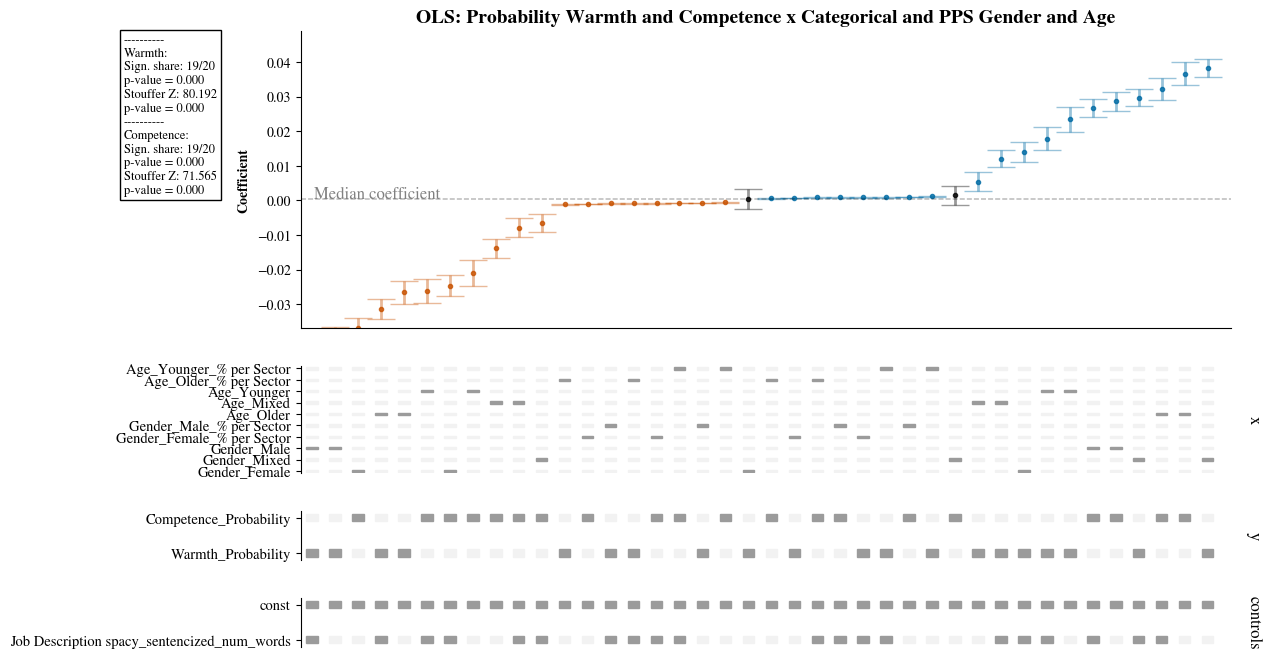

In [19]:
%%time
df_name = list(dataframes.keys())[0]
model_name=list(sm_models.keys())[0]
dvs_type=list(dvs_for_analysis.keys())[0]
ivs_type=list(ivs_for_analysis.keys())[1]

sc, df_results, df_top_coeff_p, df_std_coef_dict, df_to_save, masks_dict, sc_stats_dict = run_sc(
    df_name=df_name,
    df=dataframes[df_name],
    model_name=model_name,
    model=sm_models[model_name],
    dvs_type=dvs_type,
    dvs_name=dvs_for_analysis[dvs_type][0],
    dvs_=dvs_for_analysis[dvs_type][1],
    ivs_type=ivs_type,
    ivs_name=ivs_for_analysis[ivs_type][0],
    ivs_=ivs_for_analysis[ivs_type][1],
)
